# Importing Required Libraries

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten

# Loading the Dataset

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Reshape the images to add a channel dimension

In [26]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000,)


# Creating validataion dataset

In [27]:
x_valid, x_train = x_train[:6000],x_train[6000:]
y_valid, y_train = y_train[:6000],y_train[6000:]

# Displaying sample image from each class

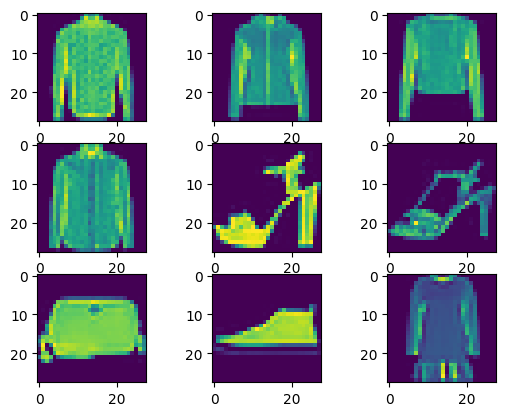

In [28]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap())

plt.show()


# Checking count of every class

In [29]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5440, 5357, 5392, 5388, 5416, 5406, 5410, 5383, 5410, 5398]))

# Normalize pixel values to range between 0 and 1.


In [30]:
x_train=x_train/255
x_test = x_test/255

# Creating the Convolutional Neural Network

In [31]:
cnn_model = keras.Sequential()
cnn_model.add(Conv2D(64,(3,3), input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(64,(3,3), padding="same",strides=(2,2), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(10,activation='softmax'))

# Compiling the model

In [32]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Training the model

In [33]:
model_history = cnn_model.fit(x_train,y_train,epochs=40,validation_data=(x_valid,y_valid))

Epoch 1/40
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5582 - accuracy: 0.7955 - val_loss: 44.5190 - val_accuracy: 0.8387
Epoch 2/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3805 - accuracy: 0.8593 - val_loss: 44.7793 - val_accuracy: 0.8357
Epoch 3/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3335 - accuracy: 0.8764 - val_loss: 45.7519 - val_accuracy: 0.8387
Epoch 4/40
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3047 - accuracy: 0.8866 - val_loss: 32.5257 - val_accuracy: 0.8592
Epoch 5/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2829 - accuracy: 0.8951 - val_loss: 37.7133 - val_accuracy: 0.8445
Epoch 6/40
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2657 - accuracy: 0.9003 - val_loss: 47.4084 - val_accuracy: 0.8332
Epoch 7/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2522 - accuracy: 0.9066 - val_loss: 55.0840 - val_

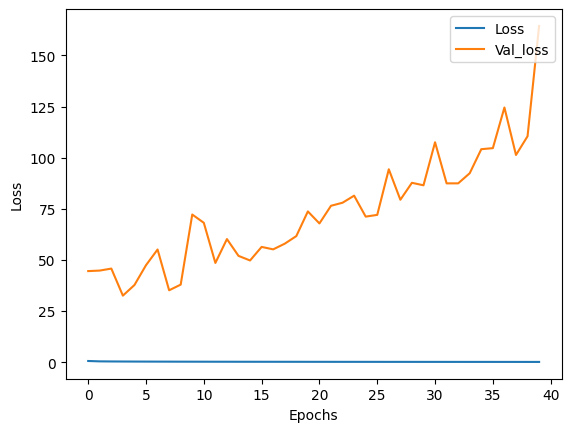

In [34]:
#Plotting the loss, val_loss
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Val_loss"], loc ="upper right")
plt.show()


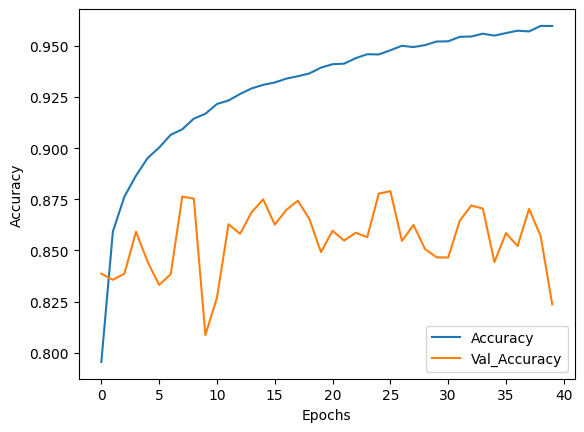

In [35]:
#Plotting the accuracy, val_acc
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Val_Accuracy"], loc ="lower right")
plt.show()

# Evaluating the Cnn Model

In [36]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.9062


[0.3781830966472626, 0.9061999917030334]

# Predicting the x_test value

In [39]:
y_pred = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
print(f"Actual values: {y_test[:10]}")
print(f"Predicted values: {y_pred[:10]}")

313/313 [==============================] - 1s 2ms/step
Actual values: [9 2 1 1 6 1 4 6 5 7]
Predicted values: [9 2 1 1 6 1 4 6 5 7]


# Displaying confusion matrix

In [40]:
confusion_matrix(y_pred,y_test)

array([[834,   3,  14,  16,   1,   0,  87,   0,   3,   0],
       [  0, 982,   0,   2,   1,   0,   1,   0,   1,   0],
       [ 22,   0, 811,  13,  25,   0,  44,   0,   3,   1],
       [ 19,   9,   7, 916,  31,   0,  22,   0,   4,   0],
       [  2,   2,  77,  25, 869,   0,  58,   0,   3,   0],
       [  1,   0,   1,   1,   0, 980,   0,  21,   4,   5],
       [113,   3,  89,  26,  72,   0, 774,   0,   3,   0],
       [  1,   0,   0,   0,   0,  14,   0, 960,   3,  34],
       [  7,   1,   1,   1,   1,   0,  14,   1, 976,   0],
       [  1,   0,   0,   0,   0,   6,   0,  18,   0, 960]])

# Displaying classification report

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       958
           1       0.98      0.99      0.99       987
           2       0.81      0.88      0.85       919
           3       0.92      0.91      0.91      1008
           4       0.87      0.84      0.85      1036
           5       0.98      0.97      0.97      1013
           6       0.77      0.72      0.74      1080
           7       0.96      0.95      0.95      1012
           8       0.98      0.97      0.98      1002
           9       0.96      0.97      0.97       985

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#Printing the model accuracy

In [42]:
accuracy_score(y_test,y_pred)

0.9062